# Práctica 3. PCA
### Integrantes
- Hernández Jiménez Erick Yael
- Patiño Flores Samuel
- Robert Garayoa Arturo

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

In [3]:
wine = load_wine(as_frame=True)
df = wine.frame
print('Forma del frame original         :',df.shape)
X = df[wine['feature_names']]
print('Forma de las entradas del frame  :', X.shape)

Forma del frame original         : (178, 14)
Forma de las entradas del frame  : (178, 13)


Normalización del dataset

In [4]:
X_mean = X.mean()
print(X_mean)

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64


In [5]:
X_std = X.std()
print(X_std)

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64


In [6]:
Z = (X - X_mean) / X_std
print(Z)

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.514341   -0.560668  0.231400          -1.166303   1.908522   
1    0.245597   -0.498009 -0.825667          -2.483841   0.018094   
2    0.196325    0.021172  1.106214          -0.267982   0.088110   
3    1.686791   -0.345835  0.486554          -0.806975   0.928300   
4    0.294868    0.227053  1.835226           0.450674   1.278379   
..        ...         ...       ...                ...        ...   
173  0.873810    2.966176  0.304301           0.300954  -0.331985   
174  0.491955    1.408636  0.413653           1.049555   0.158126   
175  0.331822    1.739837 -0.388260           0.151234   1.418411   
176  0.208643    0.227053  0.012696           0.151234   1.418411   
177  1.391162    1.578712  1.361368           1.498716  -0.261969   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.806722    1.031908             -0.657708         1.221438   
1         0.567048    0.7

Calculando covarianza

In [7]:
c = Z.cov()

Mostrando correlaciones

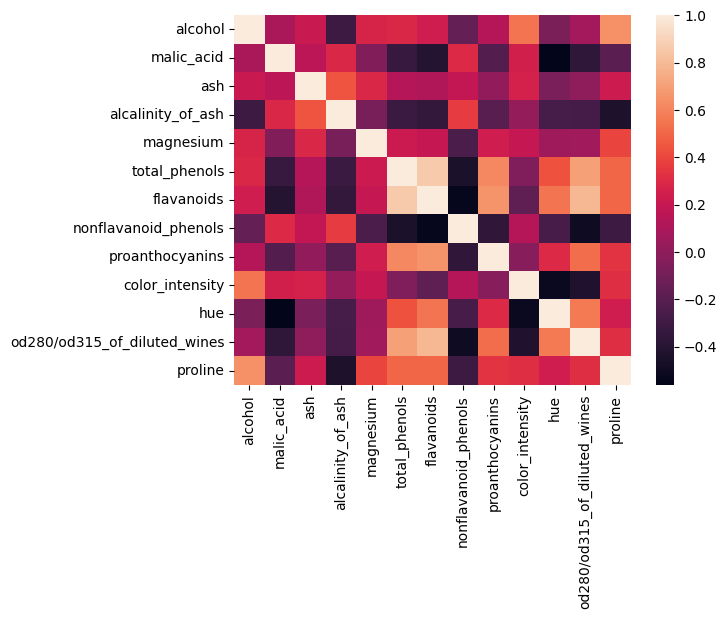

In [8]:
sns.heatmap(c)
plt.show()

Calculando los eigenvalores y los eigenvectores.

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen valores:\n', eigenvalues)
print('Forma del eigen valor    :', eigenvalues.shape)
print('Forma del eigen vector   :', eigenvectors.shape)


Eigen valores:
 [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.10337794 0.34849736 0.16877023 0.28887994 0.22578864
 0.25090248]
Forma del eigen valor    : (13,)
Forma del eigen vector   : (13, 13)


Ordenamiento de eigenvalores y eigenvectores

In [10]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

Suma acumulativa de eigenvalores, aportación de información

In [11]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Calculando el número de componentes necesarios para preservar la mayor parde de la información

In [12]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

Creación de matriz de PCA a partir de las 2 primeras componentes de los eigenvectores ordenados.

In [13]:
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = wine['feature_names'],
                             columns = ['PC1','PC2']
                            )

Producto matricial para transformar Z, se reducen dimensiones a solo 2.

In [14]:
Z_pca = Z @ pca_component
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
print(Z_pca)

         PCA1      PCA2
0   -3.307421  1.439402
1   -2.203250 -0.332455
2   -2.509661  1.028251
3   -3.746497  2.748618
4   -1.006070  0.867384
..        ...       ...
173  3.361043  2.210055
174  2.594637  1.752286
175  2.670307  2.753133
176  2.380303  2.290884
177  3.199732  2.761131

[178 rows x 2 columns]


Generación de mapa de calor

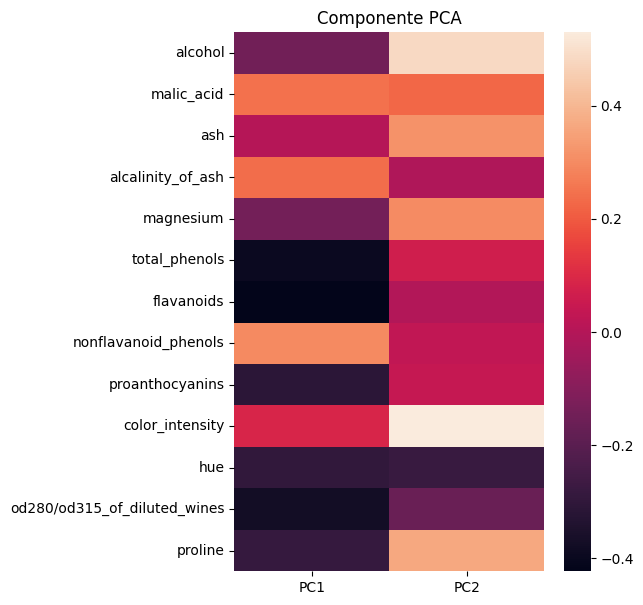

In [15]:
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('Componente PCA')
plt.show()

Graficando salida

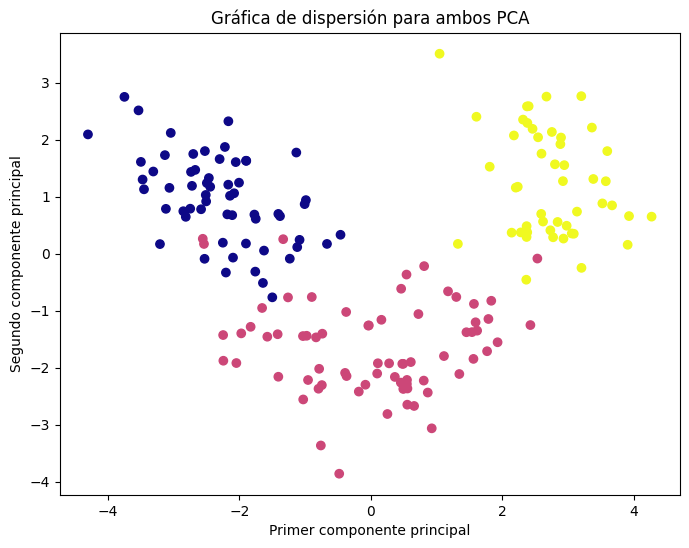

In [16]:
plt.figure(figsize=(8, 6))

plt.scatter(Z_pca['PCA1'], Z_pca['PCA2'],
            c=wine['target'],
            cmap='plasma')

plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('Gráfica de dispersión para ambos PCA')
plt.show()

#Version sklearn

Inicializando PCA

In [17]:
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)

          PC1       PC2
0    3.307421  1.439402
1    2.203250 -0.332455
2    2.509661  1.028251
3    3.746497  2.748618
4    1.006070  0.867384
..        ...       ...
173 -3.361043  2.210055
174 -2.594637  1.752286
175 -2.670307  2.753133
176 -2.380303  2.290884
177 -3.199732  2.761131

[178 rows x 2 columns]


Graficar salida

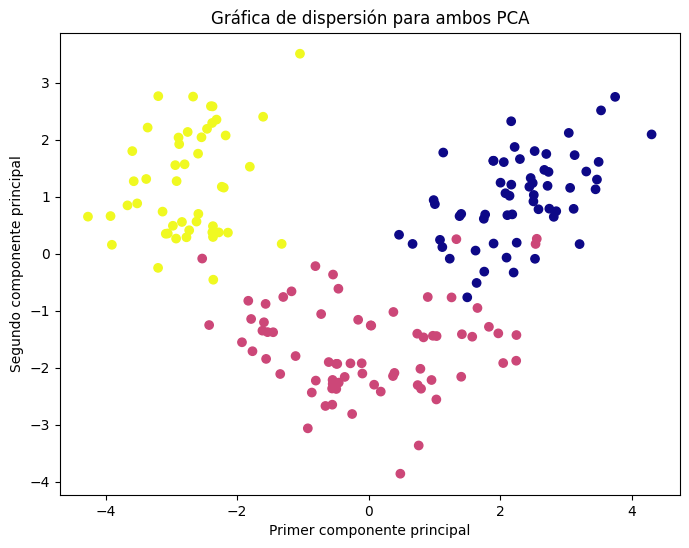

In [18]:
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=wine['target'],
            cmap='plasma')

plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('Gráfica de dispersión para ambos PCA')
plt.show()

Componentes

In [19]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283]])